In [45]:
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

In [46]:
def collect(i):
    x=pd.read_csv('data/dataset'+str(i)+'.csv',usecols=[1,2,3,4,5,6,10])
    return x.rename(columns={'Activity_Label':'Activity'})

In [47]:
columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Activity_Label']
df=collect(1)
df2=collect(2)
df3=collect(3)
df4=collect(4)
df5=collect(5)

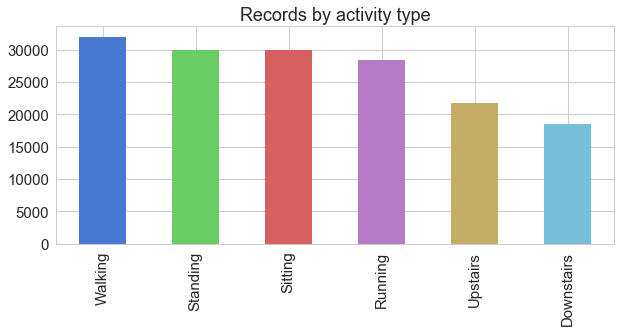

In [48]:
df['Activity'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

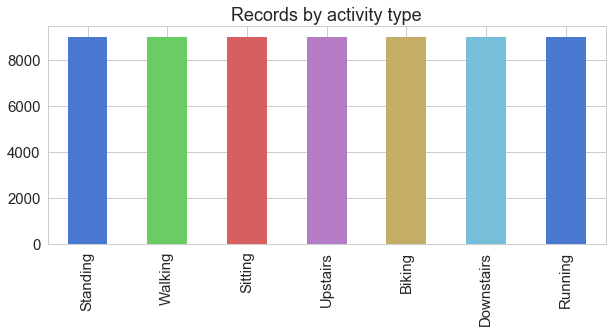

In [49]:
df4['Activity'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

In [28]:
df4.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,2.79220,-12.5720,-4.3177,0.021075,1.02990,1.22690,Walking
1,2.38360,-10.9920,-4.6037,0.201890,0.53573,1.32280,Walking
2,1.56630,-9.0848,-4.5764,0.287720,0.10049,1.20710,Walking
3,-0.61292,-8.5263,-2.9284,0.175930,-0.21441,0.90469,Walking
4,-1.18500,-9.3436,-2.2337,-0.033292,-0.48625,0.60720,Walking


In [29]:
df5.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,2.015811,6.101916,4.739881,-1.024116,-0.519541,-0.694248,Downstairs
1,2.247357,6.483285,4.562817,-0.850630,-0.415694,-0.847881,Downstairs
2,2.124774,7.000859,4.276789,-0.569937,-0.397368,-1.089478,Downstairs
3,1.893228,7.259646,4.167826,-0.400728,-0.555887,-1.230588,Downstairs
4,1.757025,7.613774,3.800077,-0.219301,-0.821919,-1.368033,Downstairs


In [30]:
def magnitude(df):
    ax2 = df['Ax']**2
    ay2 = df['Ay']**2
    az2 = df['Az']**2
    am2 = ax2 + ay2 + az2
    
    gx2 = df['Gx']**2
    gy2 = df['Gy']**2
    gz2 = df['Gz']**2
    gm2 = gx2 + gy2 + gz2
    
    df['Am']=am2.apply(lambda x: math.sqrt(x))
    df['Gm']=gm2.apply(lambda x: math.sqrt(x))

In [31]:
magnitude(df)
magnitude(df2)
magnitude(df3)
magnitude(df4)
magnitude(df5)

In [32]:
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity,Am,Gm
0,-17.365944,19.517958,0.885323,-0.121868,2.177429,1.535715,Downstairs,26.140208,2.667297
1,-9.684067,13.933616,1.157730,-0.053145,-1.751656,1.254106,Downstairs,17.007855,2.154972
2,-4.045243,7.709117,-1.266692,-0.596510,-3.471853,1.176526,Downstairs,8.797669,3.714000
3,-1.770645,5.788648,-0.735499,-0.867734,-2.983771,0.893696,Downstairs,6.097916,3.233349
4,2.819412,3.963521,0.599295,-0.541227,-2.662762,0.328645,Downstairs,4.900790,2.737012


In [33]:
def plot_activity(activity, df,i=1000):
    data = df[df['Activity'] == activity][['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']][:i]
    axis = data.plot(subplots=True, figsize=(16, 6), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_activity_magnitude(activity, df,i=1000):
    data = df[df['Activity'] == activity][['Am', 'Gm']][:i]
    axis = data.plot(subplots=True, figsize=(12, 4), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_datasets(df,i=1000):
    plot_activity("Walking", df,i)
    plot_activity("Standing", df,i)
    plot_activity("Sitting", df,i)
    plot_activity("Running", df,i)
    plot_activity("Upstairs", df,i)
    plot_activity("Downstairs", df,i)

def plot_datasets_magnitude(df,i=1000):
    plot_activity_magnitude("Walking", df,i)
    plot_activity_magnitude("Standing", df,i)
    plot_activity_magnitude("Sitting", df,i)
    plot_activity_magnitude("Running", df,i)
    plot_activity_magnitude("Upstairs", df,i)
    plot_activity_magnitude("Downstairs", df,i)

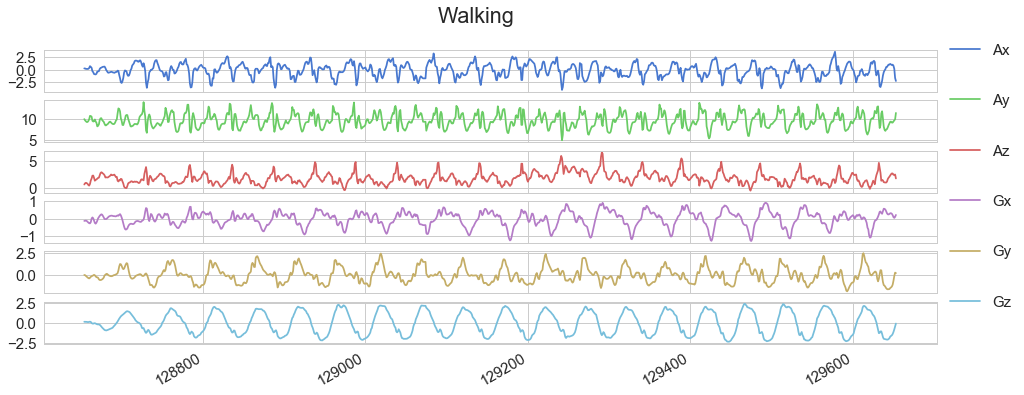

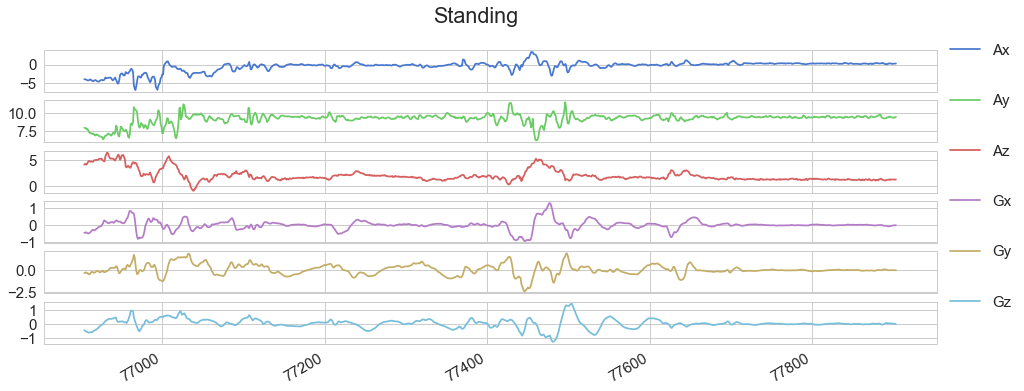

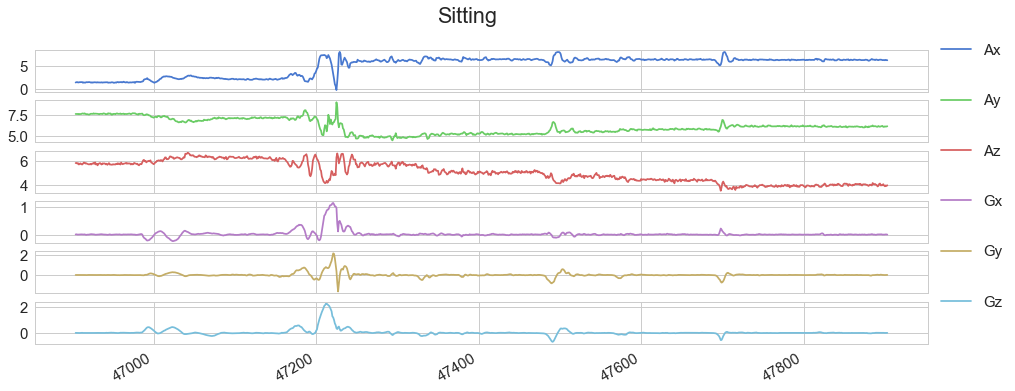

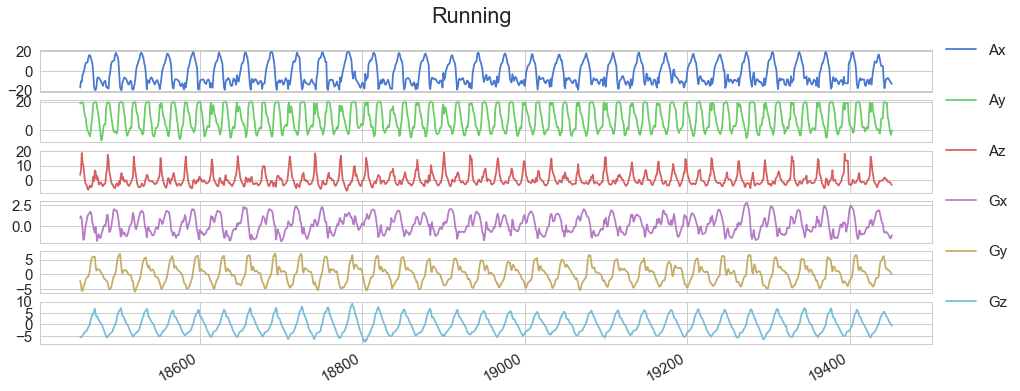

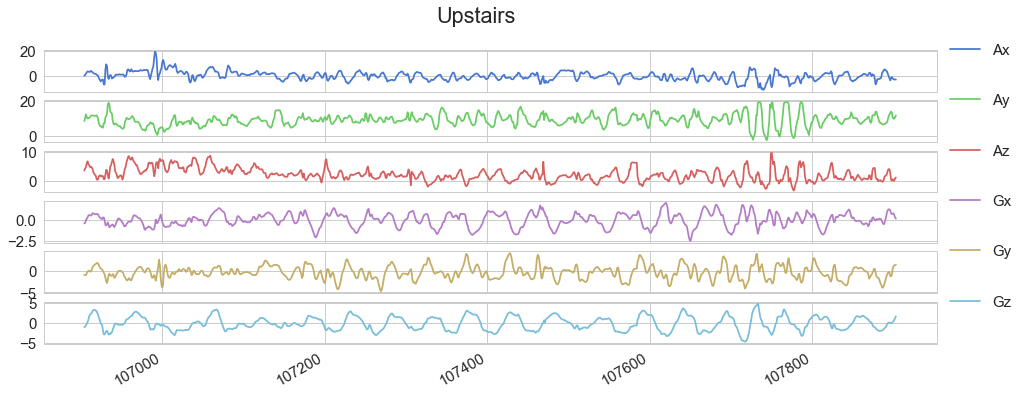

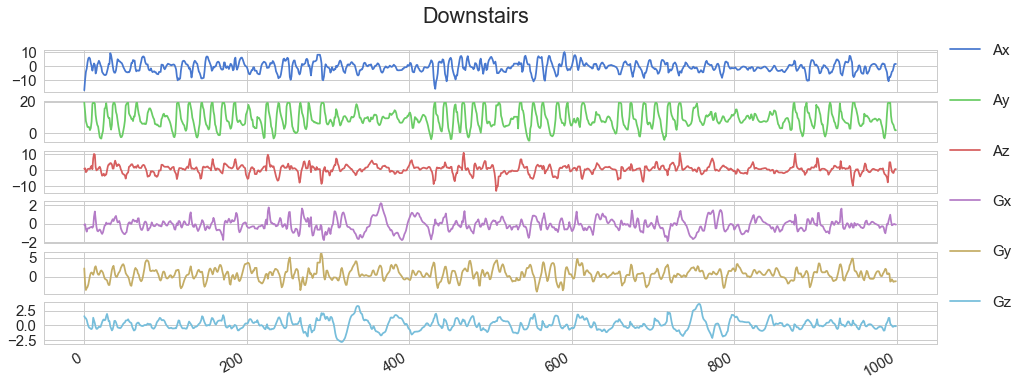

In [34]:
plot_datasets(df)

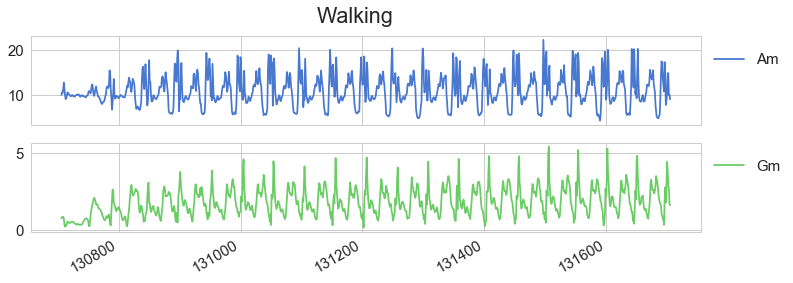

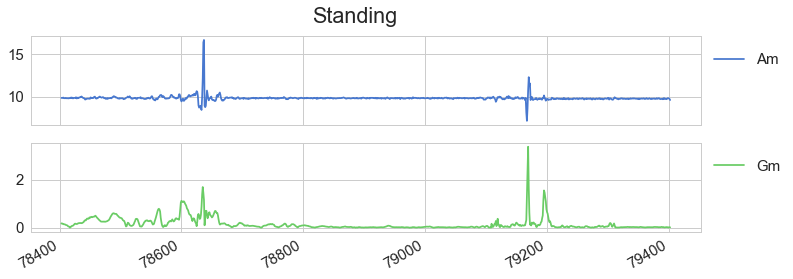

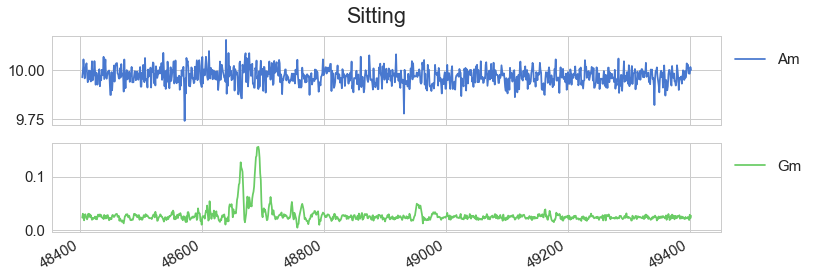

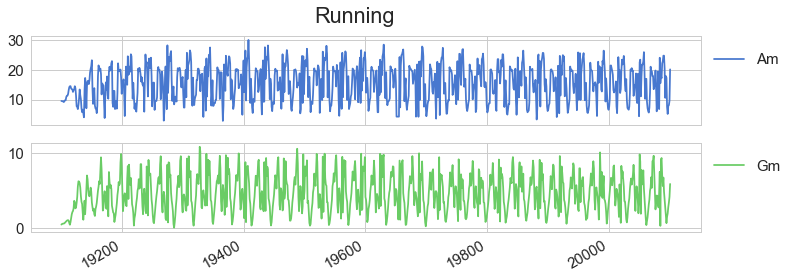

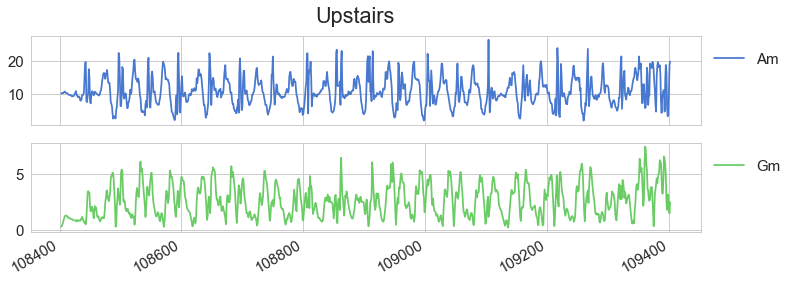

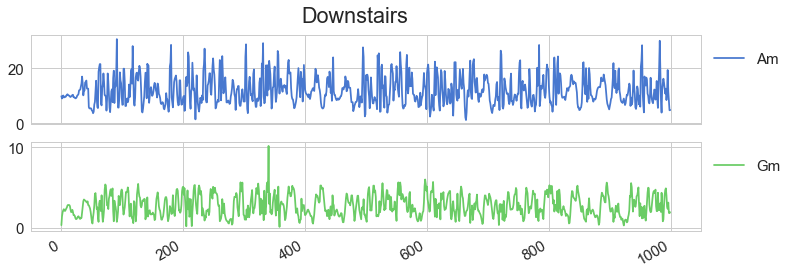

In [35]:
plot_datasets_magnitude(df3)

In [36]:
columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
dfWear1 = pd.read_csv('data/wearable1.csv',usecols=[1,2,3,4,5,6])
dfWear2 = pd.read_csv('data/wearable2.csv',usecols=[1,2,3,4,5,6])
dfWear1 = dfWear1.dropna()
dfWear2 = dfWear2.dropna()
dfWear1.head()

,Ax,Ay,Az,Gx,Gy,Gz
0,-0.465820,0.709961,0.703125,-8.178711,9.216309,-4.577637
1,-0.495605,0.709961,0.716797,-3.845215,0.305176,-1.159668
2,-0.507812,0.682129,0.697266,-5.126953,-7.202148,2.746582
3,-0.474609,0.687012,0.666504,-2.929688,-10.864258,1.281738
4,-0.479004,0.709473,0.658691,-2.319336,-7.141113,0.854492


In [37]:
magnitude(dfWear1)
magnitude(dfWear2)

In [38]:
def plot_activity2(df,i=1000):
    data = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']][:i]
    axis = data.plot(subplots=True, figsize=(16, 10))
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_activity_magnitude2(df,i=1000):
    data = df[['Am', 'Gm']][:i]
    axis = data.plot(subplots=True, figsize=(14, 5))
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

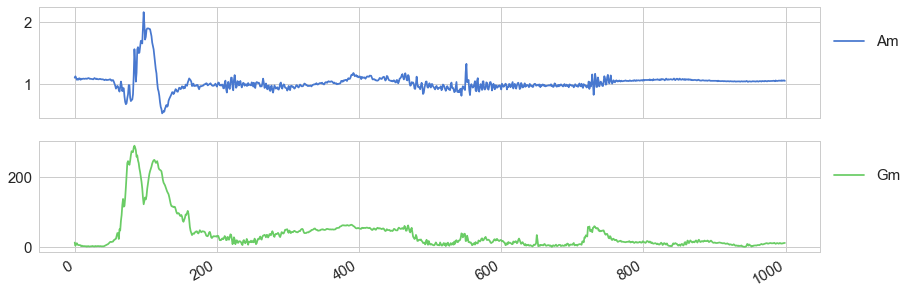

In [39]:
plot_activity_magnitude2(dfWear1)

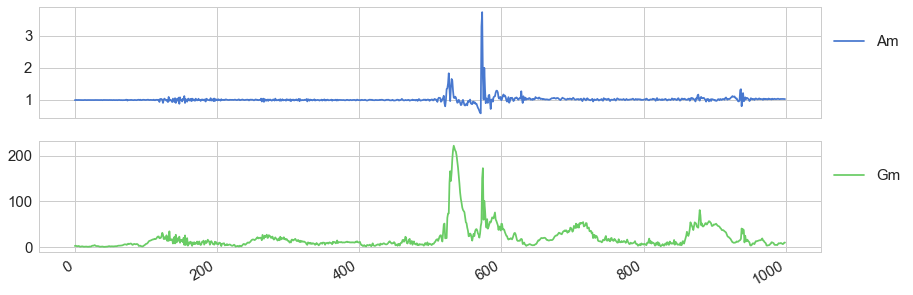

In [40]:
plot_activity_magnitude2(dfWear2)

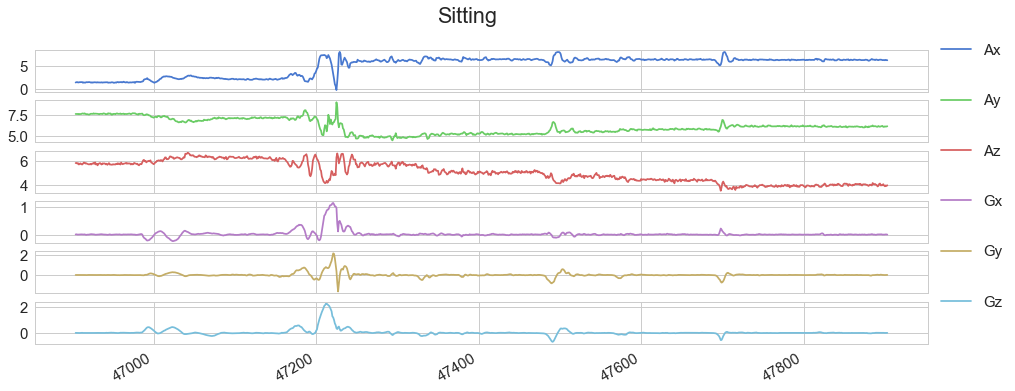

In [41]:
plot_activity("Sitting",df)

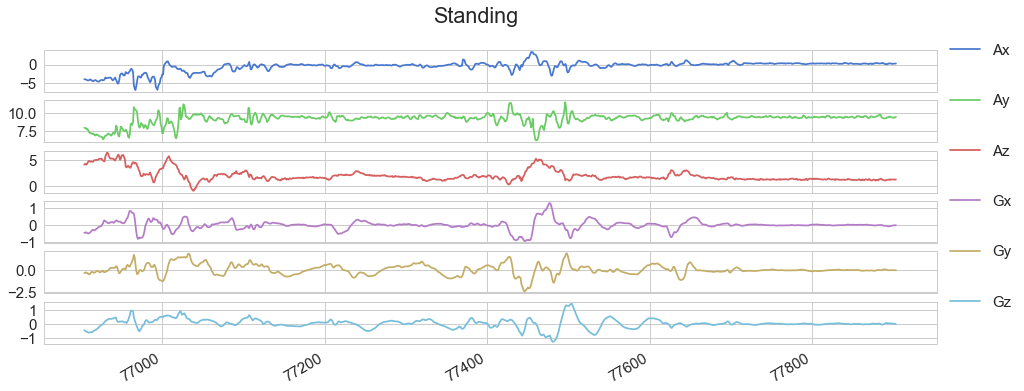

In [42]:
plot_activity("Standing",df)

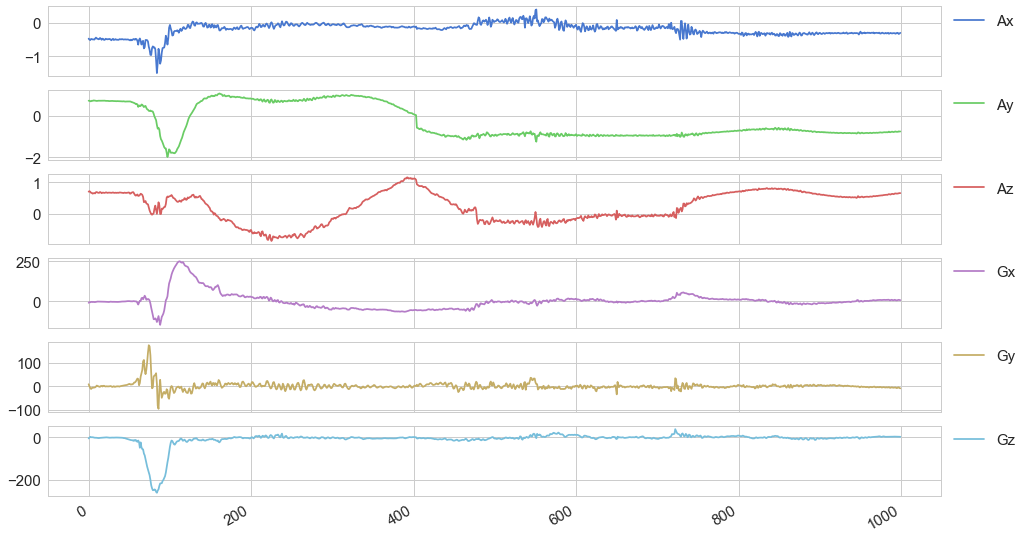

In [43]:
plot_activity2(dfWear1)

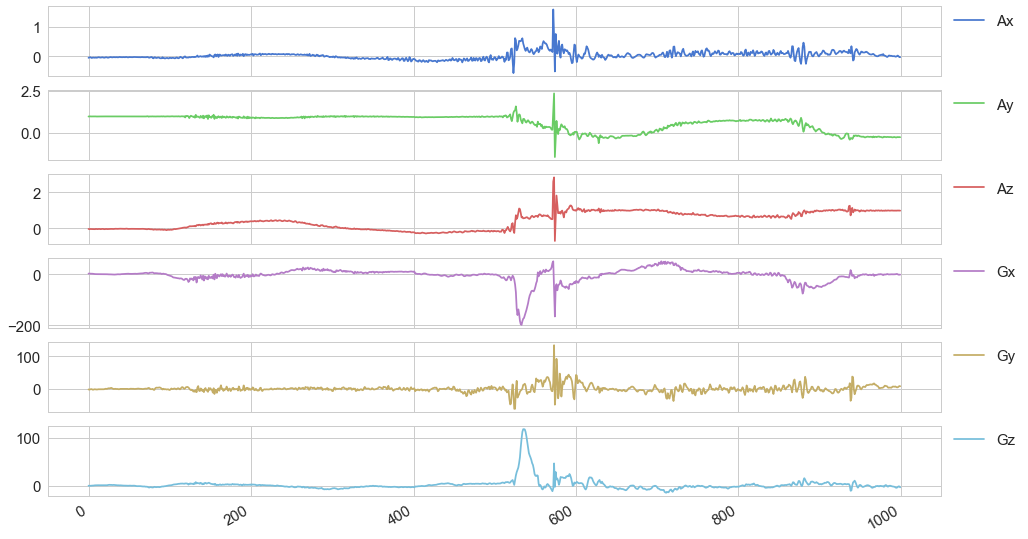

In [44]:
plot_activity2(dfWear2)